# Exploring data

In [3]:
# patient[1], chb02_19.edf

from sz_utils import data_handler, preprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
patients = data_handler.get_patients()
patient = patients[1]

edfs = data_handler.get_patient_edf(patient)

# get index of "chb02_19.edf"
edf_index_09_19 = edfs.index("chb02_19.edf")
edf = edfs[edf_index_09_19]
edf

'chb02_19.edf'

In [3]:
# get data from edf
data = data_handler.get_edf_data(patient, edf)
data.head()

Extracting EDF parameters from /mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb02/chb02_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/mnsosa/projects/SeizurePrediction/src/sz_utils/data_handler.py:75: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  mne_data = mne.io.read_raw_edf(edf_path)


,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-29.499389,-9.57265,101.391941,-32.234432,-32.625153,37.313797,94.358974,-68.962149,4.884005,...,20.122100,28.717949,1.367521,27.545788,110.378510,-101.001221,57.240537,35.360195,-53.333333,28.717949
1,0.003906,0.195360,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.007812,0.195360,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
3,0.011719,0.976801,0.19536,0.195360,-0.195360,0.976801,0.586081,-0.195360,0.195360,0.195360,...,0.586081,0.195360,-0.586081,0.195360,0.586081,0.195360,0.586081,0.195360,-0.195360,0.195360
4,0.015625,-0.976801,0.19536,0.586081,0.976801,-0.586081,0.586081,0.195360,0.195360,-2.148962,...,-1.367521,-0.586081,1.367521,0.195360,0.586081,-0.195360,0.195360,0.976801,0.195360,-0.586081


<AxesSubplot: >

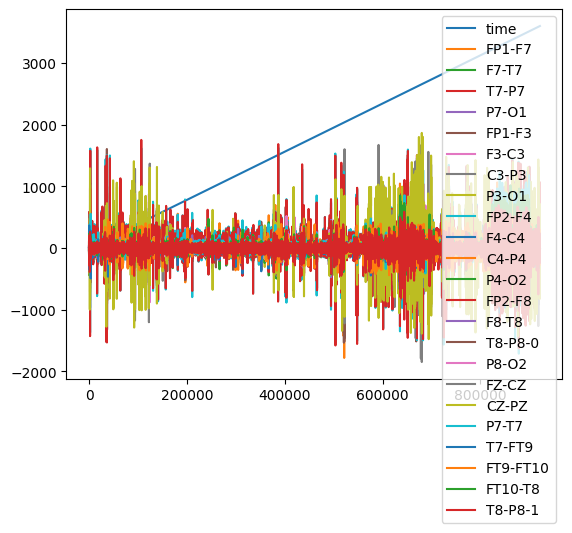

In [4]:
data.plot()

In [5]:
# get seizure data
seizure_data = data_handler.get_seizure_data(patient)
seizure_data[seizure_data["file_name"] == edf]

,file_name,number_of_seizures,start_end_times
19,chb02_19.edf,1,"[(3369, 3378)]"


In [6]:
data

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-29.499389,-9.572650,101.391941,-32.234432,-32.625153,37.313797,94.358974,-68.962149,4.884005,...,20.122100,28.717949,1.367521,27.545788,110.378510,-101.001221,57.240537,35.360195,-53.333333,28.717949
1,0.003906,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
3,0.011719,0.976801,0.195360,0.195360,-0.195360,0.976801,0.586081,-0.195360,0.195360,0.195360,...,0.586081,0.195360,-0.586081,0.195360,0.586081,0.195360,0.586081,0.195360,-0.195360,0.195360
4,0.015625,-0.976801,0.195360,0.586081,0.976801,-0.586081,0.586081,0.195360,0.195360,-2.148962,...,-1.367521,-0.586081,1.367521,0.195360,0.586081,-0.195360,0.195360,0.976801,0.195360,-0.586081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,3599.980469,-29.499389,-20.122100,-8.791209,-13.870574,-33.797314,-62.710623,10.744811,10.744811,12.698413,...,25.592186,-16.996337,-20.122100,-32.625153,-3.321123,9.181929,-9.963370,4.102564,29.890110,-16.996337
921596,3599.984375,-17.777778,-16.214896,-10.354090,-15.433455,-22.466422,-54.896215,6.837607,8.009768,4.102564,...,15.433455,-0.976801,-23.638584,-31.062271,6.446886,10.744811,2.930403,2.539683,7.619048,-0.976801
921597,3599.988281,-56.459096,-12.698413,-18.559219,-5.665446,-59.975580,-59.584860,4.493284,19.340659,-0.195360,...,6.837607,13.479853,-20.512821,-33.406593,11.916972,18.949939,6.056166,0.586081,-8.791209,13.479853
921598,3599.992188,-32.625153,-0.586081,-31.452991,-6.446886,-43.565324,-45.128205,2.539683,13.089133,0.976801,...,-14.652015,25.982906,-17.387057,-29.890110,25.201465,31.843712,-10.744811,-0.195360,-16.605617,25.982906


In [7]:
start_sz = 3369
end_sz = 3378

# data where is equal to start_sz
data[data["time"] == start_sz]

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
862464,3369.0,-43.565324,13.870574,-13.870574,48.644689,-16.214896,-10.35409,-12.698413,45.128205,-13.870574,...,-104.908425,-50.598291,39.65812,-19.340659,-13.479853,14.261294,0.19536,122.100122,-91.623932,-50.598291


In [8]:
# data where is equal to end_sz
data[data["time"] == end_sz]

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
864768,3378.0,-21.294261,-36.141636,37.313797,4.102564,-56.068376,-15.433455,38.876679,17.777778,-34.969475,...,17.777778,24.420024,10.35409,5.274725,20.1221,-36.923077,-0.19536,23.638584,0.19536,24.420024


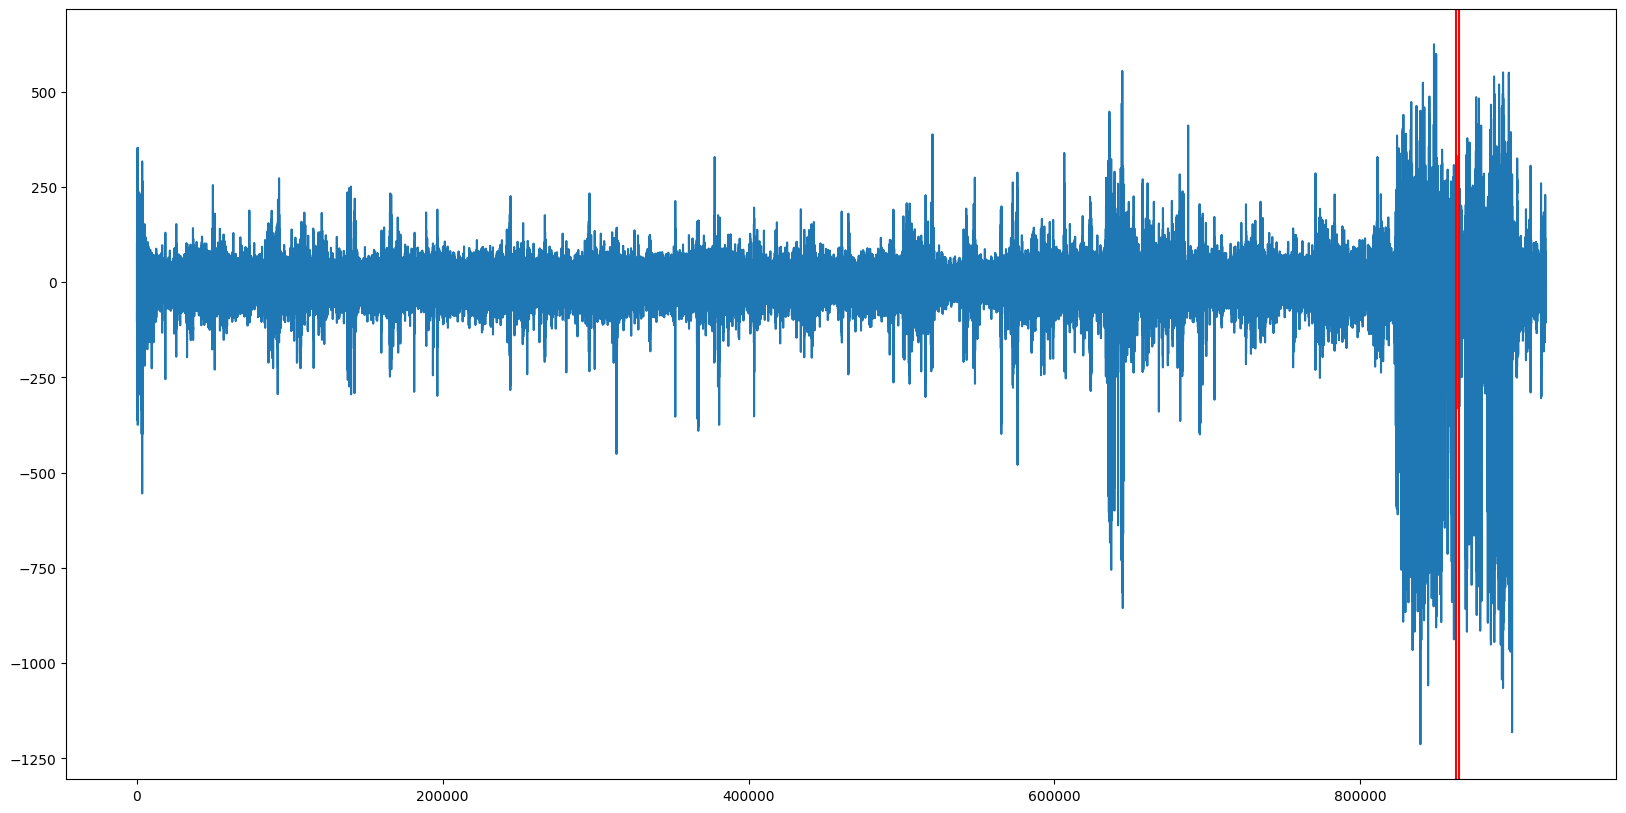

In [9]:
# data add column "seizure" with value 0
data["seizure"] = 0

# data from time = start_sz to time = end_sz is seizure = 1
data.loc[(data["time"] >= start_sz) & (data["time"] <= end_sz), "seizure"] = 1

# get index where time = start_sz and time = end_sz
start_sz_index = data[data["time"] == start_sz].index[0]
end_sz_index = data[data["time"] == end_sz].index[0]

# plot
data.drop("time", axis=1)[data.columns[3]].plot(figsize=(20, 10))
# plot vertical line in start_sz and end_sz
plt.axvline(x=start_sz_index, color="red")
plt.axvline(x=end_sz_index, color="red")

plt.show()

In [10]:
# value counts of seizure
data["seizure"].value_counts()

0    919295
1      2305
Name: seizure, dtype: int64

In [11]:
# how many seconds did the seizure last
end_sz - start_sz

9

# Other patient

In [5]:
patients = data_handler.get_patients()

patient = patients[9]
edfs = data_handler.get_patient_edf(patient)    

seizure_data = data_handler.get_seizure_data(patient)
seizure_data[seizure_data["number_of_seizures"] > 0]

,file_name,number_of_seizures,start_end_times
8,chb10_12.edf,1,"[(6313, 6348)]"
16,chb10_20.edf,1,"[(6888, 6958)]"
19,chb10_27.edf,1,"[(2382, 2447)]"
21,chb10_30.edf,1,"[(3021, 3079)]"
22,chb10_31.edf,1,"[(3801, 3877)]"
23,chb10_38.edf,1,"[(4618, 4707)]"
24,chb10_89.edf,1,"[(1383, 1437)]"


In [6]:
import ast

edf = edfs[8] # has a seizure
start_end_times = seizure_data[seizure_data["file_name"] == edf]["start_end_times"].values[0]
start_time, end_time = ast.literal_eval(start_end_times)[0]
print(patient, edf)
data = data_handler.get_edf_data(patient, edf)
data.head()

chb10 chb10_12.edf
Extracting EDF parameters from /mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb10/chb10_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/mnsosa/projects/SeizurePrediction/src/sz_utils/data_handler.py:75: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  mne_data = mne.io.read_raw_edf(edf_path)


,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,78.827839,-27.838828,238.827839,-61.245421,10.256410,-2.637363,78.241758,142.710623,-63.003663,...,84.688645,-271.062271,55.970696,-153.260073,88.791209,-238.241758,-36.043956,508.424908,-156.190476,-271.062271
1,0.003906,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040
2,0.007812,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.879121,-1.465201,0.293040,0.293040,0.293040,0.293040,0.293040,-0.293040,3.223443,-1.465201
3,0.011719,0.293040,0.293040,0.293040,0.879121,1.465201,0.293040,0.293040,0.293040,2.051282,...,-0.293040,0.293040,0.293040,0.879121,0.293040,0.293040,0.293040,-0.879121,3.223443,0.293040
4,0.015625,0.879121,0.879121,0.293040,-0.879121,0.293040,0.293040,0.293040,-0.293040,-0.879121,...,-5.567766,14.358974,0.293040,0.293040,0.293040,0.293040,0.879121,4.395604,-20.219780,14.358974


In [7]:
# data add column "seizure" with value 0
data["seizure"] = 0

# data from time = start_sz to time = end_sz is seizure = 1
data.loc[(data["time"] >= start_time) & (data["time"] <= end_time), "seizure"] = 1

# get index where time = start_sz and time = end_sz
start_sz_data = data[data["time"] == start_time]
end_sz_data = data[data["time"] == end_time]

# join them
start_end_sz_data = pd.concat([start_sz_data, end_sz_data])
start_end_sz_data


,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure
1616128,6313.0,6.153846,84.102564,-56.556777,48.351648,40.146520,40.732601,-62.417582,65.347985,126.300366,...,70.036630,92.307692,113.992674,-25.494505,57.142857,38.388278,-79.413919,-7.912088,70.036630,1
1625088,6348.0,-71.794872,88.205128,54.798535,-34.285714,-142.124542,149.157509,79.413919,-50.695971,74.725275,...,-14.945055,2.637363,116.336996,3.223443,-54.212454,53.040293,138.021978,-7.912088,-14.945055,1


In [8]:
start_sz_index = start_end_sz_data.index[0]
end_sz_index = start_end_sz_data.index[1]

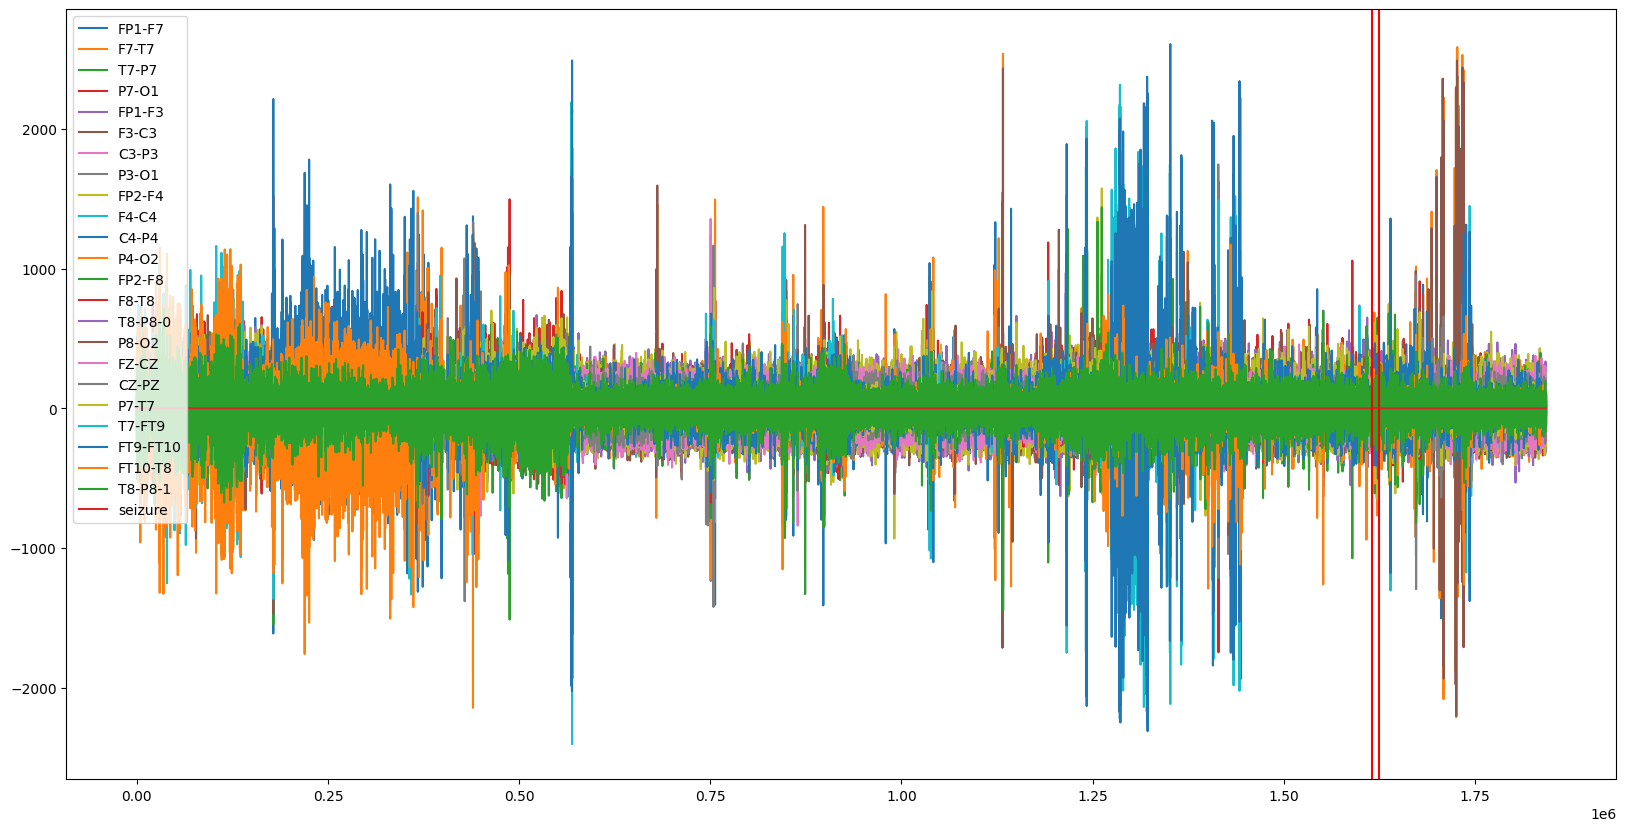

In [12]:
# plot
data.drop("time", axis=1).plot(figsize=(20, 10))
# plot vertical line in start_sz and end_sz
plt.axvline(x=start_sz_index, color="red")
plt.axvline(x=end_sz_index, color="red")

plt.show()